# Aufgabe 2 - CNN


In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


## Variablen

In [2]:
epochs = 20
batch_size = 128
sgd = SGD(0.01)


## Dataset

In [3]:
# Grab the MNIST dataset
# The dataset is already split into train and test set (with distribution train:60k to test:10k)
print("[INFO] accessing MNIST...")
((train_X, train_y), (test_X, test_y)) = mnist.load_data()

# Each image in the MNIST dataset is represented as a 28x28x1
# Flatten the images from 28x28 pixels to list with length 784 to be able to apply it to standart feed forward neural network
#train_X = train_X.reshape((train_X.shape[0], 28 * 28 * 1))
#test_X = test_X.reshape((test_X.shape[0], 28 * 28 * 1))
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

# Scale data to the range of [0, 1]
train_X = train_X.astype("float32") / 255.0
test_X = test_X.astype("float32") / 255.0

# Perform one-hot-encoding to convert the labels from integers to vectors
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)


[INFO] accessing MNIST...


## a) Netzwerk

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
#1
model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#2
model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#3
model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#4
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#5
model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#6
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(10, activation="softmax"))

## b) Training

In [11]:
# train the model using SGD and categorical crossentropy
print("[INFO] training network...")
epochs = 20
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=epochs, batch_size=128, verbose=2)

[INFO] training network...
Epoch 1/20
469/469 - 121s - loss: 1.8820 - accuracy: 0.3862 - val_loss: 0.6182 - val_accuracy: 0.8012
Epoch 2/20
469/469 - 104s - loss: 0.3561 - accuracy: 0.8903 - val_loss: 0.2562 - val_accuracy: 0.9208
Epoch 3/20
469/469 - 104s - loss: 0.2078 - accuracy: 0.9358 - val_loss: 0.1826 - val_accuracy: 0.9406
Epoch 4/20
469/469 - 103s - loss: 0.1591 - accuracy: 0.9512 - val_loss: 0.1391 - val_accuracy: 0.9571
Epoch 5/20
469/469 - 105s - loss: 0.1342 - accuracy: 0.9590 - val_loss: 0.1308 - val_accuracy: 0.9601
Epoch 6/20
469/469 - 105s - loss: 0.1172 - accuracy: 0.9644 - val_loss: 0.1053 - val_accuracy: 0.9676
Epoch 7/20
469/469 - 106s - loss: 0.1078 - accuracy: 0.9674 - val_loss: 0.1066 - val_accuracy: 0.9673
Epoch 8/20
469/469 - 105s - loss: 0.0966 - accuracy: 0.9698 - val_loss: 0.0872 - val_accuracy: 0.9726
Epoch 9/20
469/469 - 107s - loss: 0.0890 - accuracy: 0.9728 - val_loss: 0.0828 - val_accuracy: 0.9750
Epoch 10/20
469/469 - 105s - loss: 0.0827 - accuracy: 0

## c) Evaluation

In [6]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_X, batch_size=128)
print(classification_report(test_y.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



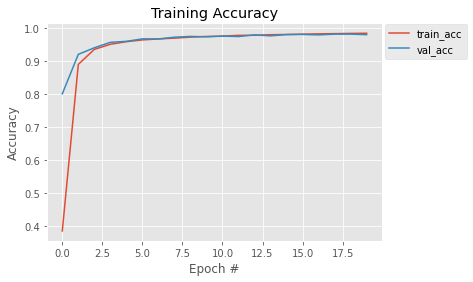

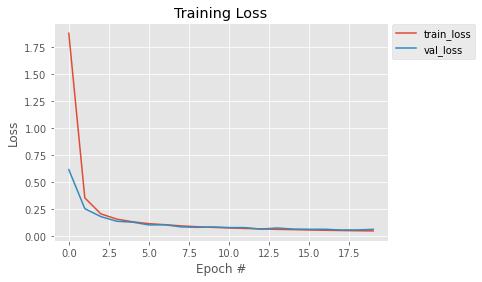

In [12]:
# plot the training accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(0.995,1.02), loc="upper left", ncol=1)
plt.show()

# plot the training loss
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(0.995,1.02), loc="upper left", ncol=1)
plt.show()

Beschreibung c)

## d) ANN vs. CNN
Im Vergleich zum ANN aus Aufgabe 1 hat das CNN hier eine weitaus bessere Performance. Beim einfachen ANN haben wir eine Accuracy von ca. 90% erreicht, woohingegen wir hier einen Wert von ca. 98% erreichen.
Grund hierfür ist, dass das CNN durch seine Beschaffenheit besser in der LAge ist mit Bilddaten umzugehen. Wir haben hier die Möglichkeit dem Netzwerk das Bild als ganzes zu übergeben, sodass die Zusammenhänge innerhalb der 2-dimensoinalen Eingabe bestehen bleiben, wohingegen es beim ANN notwendig ist das Bild zeilenweise aneinander zu fügen, um einen eindimensionalen Vektor zu bekommen, welcher von der Input Schicht des ANN angenommen werden kann.


## e)
#### Grundaufbau des Netzes:
- Activation Function: Rectified Linear Unit (ReLU), da das Netzwerk für diese Funktion in der vorherigne Teilaufgabe eine gute Performance aufwies.
- Convolutional Filter Size: 3x3
- Neuronen Conv2D: 32
- Pooling: MaxPooling mit 2x2 Matrix
- Netzwerk zu Beginn: Conv2D-Conv2D-MaxPooling-Flatten-Dense
- Fortschreitende Erweiterung der Komplexität: Sukkzesives Hinzufügen von Conv2D + MaxPooling Layer

Fehlt noch

In [20]:
def make_model(layers):
	model = Sequential()
	model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
	for layer in layers:
		model.add(Conv2D(layer, kernel_size=3, activation='relu'))
		model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Flatten())
	model.add(Dense(10, activation="softmax"))
	return model

In [21]:
# train the model using SGD
print("[INFO] training network...")

layers = [32,32,32,32,32,32,32]
histories = []

for i in range(len(layers)+1):
	layers_local = layers[0:i]
	print(layers_local)
	model = make_model(layers_local)
	model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
	H = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=epochs, batch_size=256, verbose=2)
	histories.append(H)

[INFO] training network...
[]
Epoch 1/20
235/235 - 8s - loss: 1.0602 - accuracy: 0.7751 - val_loss: 0.4506 - val_accuracy: 0.8789
Epoch 2/20
235/235 - 8s - loss: 0.4151 - accuracy: 0.8844 - val_loss: 0.3608 - val_accuracy: 0.8977
Epoch 3/20
235/235 - 6s - loss: 0.3618 - accuracy: 0.8972 - val_loss: 0.3296 - val_accuracy: 0.9080
Epoch 4/20
235/235 - 6s - loss: 0.3392 - accuracy: 0.9034 - val_loss: 0.3133 - val_accuracy: 0.9132
Epoch 5/20
235/235 - 6s - loss: 0.3246 - accuracy: 0.9071 - val_loss: 0.3047 - val_accuracy: 0.9144
Epoch 6/20
235/235 - 6s - loss: 0.3145 - accuracy: 0.9108 - val_loss: 0.2942 - val_accuracy: 0.9184
Epoch 7/20
235/235 - 6s - loss: 0.3071 - accuracy: 0.9130 - val_loss: 0.2920 - val_accuracy: 0.9185
Epoch 8/20
235/235 - 6s - loss: 0.3010 - accuracy: 0.9149 - val_loss: 0.2845 - val_accuracy: 0.9198
Epoch 9/20
235/235 - 6s - loss: 0.2965 - accuracy: 0.9165 - val_loss: 0.2830 - val_accuracy: 0.9194
Epoch 10/20
235/235 - 6s - loss: 0.2923 - accuracy: 0.9168 - val_loss:

ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_16/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_16/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,32].

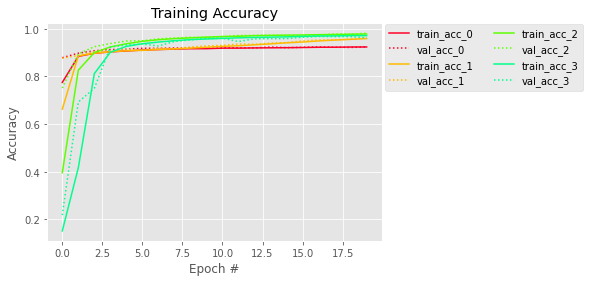

In [22]:
# plot the training accuracy
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(layers))]

plt.style.use("ggplot")
plt.figure()
i = 0
for history in histories:
	plt.plot(np.arange(0, epochs), history.history["accuracy"], color=colors[i], label="train_acc_" + str(i))
	plt.plot(np.arange(0, epochs), history.history["val_accuracy"], color=colors[i], label="val_acc_" + str(i), linestyle="dotted")
	i += 1
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(0.995,1.02), loc="upper left", ncol=2)
plt.show()

## f) As we said before, CNNs are good at image data. What could be the reasons behind this?

Um zu verstehen warum CNNs so gut mit Bilddaten umgehen können, müssen wir zunächst betrachten wie Bilder überhaupt maschinell repräsentiert sind. Im Gegensatz zur menschlichen Wahrnehmung eines Bildes, wo das Bild als Ganzes mit konkreten Formen und Mustern wahrgenommen wird, sieht eine Maschine lediglich eine Matrix mit Zahlen welche die einzelnen Pixel repräsentieren.

![Bildpixel Matrixdarstellung](Bilder/pixel.png)

Die Aufgabe des Neuronalen Netzes, sei es ein CNN oder ANN, ist es nun anhand dieser Matrix, und des vorgegebenen Labels Rückschlüsse auf den Inhalt des Bildes zu ziehen.

Wenn wir nun genauer auf die Architekturen der neuronalen Netze eingehen, wird schnell ersichtlich, dass das CNN eindeutig im Vorteil ist.

Die grundlegende Architektur eines ANN ist in folgendem Bild illustriert:

![ANN](Bilder/ann.png)

Man beachte, dass dieses Netzwerk im Grunde aus drei Schichten aufgebaut ist. Den Eingang, die Schicht welche die Daten annimmt, stellt das Input Layer dar. Die anschließende Weiterleitung der Daten erfolgt über die Hidden Layers. Schließlich gelangen die Daten zum Output Layer wo dann die Ausgabe erzeugt wird. Wenn wir nun die Form der Daten, welche hier durch die einzelnen Schichten gereicht werden, genauer betrachtet, stellen wir fest, dass es sich hier um einen Vektor der Form 1xn handelt.

Das „Problem“ das wir nun mit Bilddaten haben, ist dass diese, wenn man sie als Matrix betrachtet, eben nicht der Form 1xn, sondern vielmehr der Form mxn, bzw. nxn für quadratische Bilder, entsprechen. 

Würden wir nun ein ANN verwenden, so währe eine Transformation des Bildes notwendig. Aus der mxn Matrix müssten wir zunächst einen Vektor der Form 1xn erzeugen. Dieses Vorgehen wird „Flattening“ genant und ist im folgenden illustriert:

1 2 3

4 5 6        —>        1 2 3 4 5 6 7 8 9

7 8 9

Die Verwendung von Bilddaten in ANNs ist somit grundsätzlich möglich, das Flattening bringt jedoch Probleme mit sich, welche sich durchaus negativ auf die Performance eines solchen Modells auswirken werden.
Durch das Flattening sind ANNs folglich nicht mehr in der Lage, Objekte in einem Bild unabhängig von der Position des Objekts im Bild zu erkennen. Das gleiche Objekt an einer anderen Position im Bild hätte einen völlig anderen Input-Vektor und würde somit nicht mehr, oder nur sehr erschwert, als gleichartig erkannt werden. 
Ein weiteres Problem ergibt sich wenn wir nun einmal annehmen, dass die Bilder die wir klassifizieren wollen, nicht wie z.B. beim MNIST Datensatz 28x28 Pixel haben, sondern es sich um Bilder der Größe 1000x1000 Pixel handelt. Der Input-Vektor der 28x28 Pixel Bilder hätte eine Länge von 784, was noch durchaus vertretbar wäre. Der Vektor der Bilder mit 1000x1000 Pixel hätte eine Länge von 1000000, was bedeutet, dass das Input Layer ebenfalls 1000000 Neuronen beinhalten müsste. Das Netzwerk wäre damit direkt extrem groß, was jedoch dem grundlegenden Ziel, die Netzwerke möglichst klein und wenig komplex zu halten, widerspricht.

Nun stellt sich die Frage wie denn anhand von Bilddaten erfolgversprechend mit Methoden aus dem Bereich des Deep Learning Klassifizierungsaufgaben durchgeführt werden können. Da ANNs aufgrund ihrer Beschaffenheit nur bedingt geeignet sind um mit Bilddaten zu arbeiten betrachten wir im Folgenden Convolutional Neural Networks (CNN).

Ein CNN besteht im wesentlichen aus Filtern (genannt Convolutional Layer) und Aggregations-Schichten (genannt Pooling Layer), die sich abwechselnd wiederholen, und am Ende aus einer oder mehreren Schichten von „normalen“ vollständig verbundenen Neuronen (genannt Dense oder auch Fully Connected Layer).

![CNN](Bilder/cnn.png)
 
Der große Unterschied vom CNN gegenüber dem ANN ist, das wir hier eine Kombination aus Convolutional und Pooling Layers, gefolgt von einem Fully Connected Netzwerk, den Dense Layers verwenden. Innerhalb dieser Schichten wie das Eingabe Datum, gefaltet und damit Features extrahiert, sowie durch Pooling in seiner Größe reduziert. Auch sind die Neuronen des CNN in den Convolutional Layers so angeordnet, dass grundsätzlich die Eingabe von mehrdimensionalen Daten und insbesondere von 2-dimensionale Eingaben wie z.B. Bildern, unterstützt wird. 

#### Convolutional Layers
Die Convolutional Layers übernehmen dabei die Faltungsaufgabe, indem die Eingabematrix, also die Bilddaten, mit einer Filtermatrix verrechnet werden. Mit Hilfe einer kleineren Filtermatrix, deren Größe vorab auf z.B. 3x3 Pixel definiert wurde, wird die Faltung berechnet, welche dann als neue Matrix den Output darstellt (und ggf. den Input des folgenden Convolutional Layers). Da verschiedene Filtermatrizen verwendet werden können, ist es möglich durch mehrmalige Anwendung unterschiedliche Features zu extrahieren. 

![Convolutional Layer](Bilder/filter.png)

#### Pooling Layers
In der Regel folgt auf ein Convolutional ein Pooling Layer. Der Pooling Layer aggregiert die Ergebnisse von Convolutional Layern, indem jeweils nur das stärkste Signal weiter gegeben wird. Bei einem MaxPooling Layer wird z.B. immer der höchste Wert einer Kernel-Matrix verwendet und alle anderen werden verworfen. Die von einem 2 x 2 Kernel erstellten vier Matrix Ergebnisse werden so auf nur eine Zahl (die höchste der vier) reduziert. Das Pooling dient dazu, nur die relevantesten Signale an die nächsten Schichten weiter zu geben, eine abstraktere Repräsentation des Inhalts zu erreichen und die Anzahl der Parameter eines Netzes zu reduzieren.

![Pooling Layer](Bilder/pooling.png)

#### Dense Layers
Beim Fully Connected Layer oder Dense Layer handelt es sich um eine normale neuronale Netzstruktur, bei der alle Neuronen mit allen Inputs und allen Outputs verbunden sind. Um den Matrix-Output der Convolutional- und Pooling-Layer in einen Dense Layer speisen zu können, muss hier zunächst die Flattening Operation ausgeführt werden. Flattening ist hier, im Gegensatz zum ANN, problemlos möglich, da die Output-Signale der Filter-Schichten unabhängig von der Position eines Objektes sind und daher sind zwar keine Positionsmerkmale mehr vorhanden sind, dafür aber ortsunabhängige Objektinformationen.

### Zusammenfassung
Abschließende kann man nun zusammenfassen, dass durch die Anwendung von Filtermatrizen zum erzeugen von Faltungen, die Reduktion der Daten bzw. des Netzwerks durch Pooling und die geschickte Anordnung der Neuronen in den vorderen Schichten, CNNs in der Lagen sind die Zusammenhänge innerhalb der Bilddaten zu erkennen und damit hervorragend geeignet sind um auf solchen Daten Klassifizierungsaufgaben auszuführen.


## j) What is batch normalization? 
Batch Normalization ist die Anwendung einer Normalisierungstechnik auf die Eingabewerte der Hidden Layers. Im Gegensatz zur Normalisierung wird Batch Normalization nicht zu Beginn auf die Rohdaten, sondern eben für jedes Hidden Layer auf die Eingabedaten angewendet, bevor diese in die Aktivierungsfunktion gegeben werden.

Grundsätzlich wird Batch Normalization verwendet um die Konvergenzrate und damit die Geschwindigkeit beim Training zu erhöhen, indem der Covariate Shift reduziert wird.

Die Idee ist, dass selbst wenn sich die Werte der Eingaben der Hidden Layers ändern, der Mittelwert und ihre Standardabweichung immer noch fast gleich bleiben, wodurch der Covariate Shift reduziert wird. Dies schwächt die Kopplung zwischen den Parametern der vorherigen Schicht und denen der folgenden Schichten, wodurch ermöglicht wird, dass jede Schicht des Netzwerks unabhängiger voneinander, sozusagen für sich selbst lernt. Dadurch wird der Lernprozess beschleunigt.

Ein weiterer Vorteil von Batch Normalization besteht darin, dass es als Regularisierung fungiert. Jeder Mini-batch wird mit seinem Mittelwert und seiner Standardabweichung skaliert. Dies führt zu einem gewissen Rauschen in jeder Ebene und bietet einen Regularisierungseffekt.

Zusammengefasst dient Batch Normalization bei ANNs und CNNs dem Zweck das Training zu beschleunigen und dabei die Ergebnisse die, in Bezug auf die Genauigkeit des Modells, erzielt werden können auch noch zu verbessern.


## g) What is regularization?
Ein verbreitetes Problem beim Training von neuronalen Netzen ist Overfitting. Was Overfitting genau ist haben wir in Aufgabe 1 f) bereits beschrieben. 

Im folgenden betrachten wir Regularisierung, eine Möglichkeit wie man dem Problem des Overfittings entgegen wirken kann und gehen dabei auf drei konkrete Regularisierungsmethoden ein.

### Dropout
Dropout ist eine Methode zur Reduzierung von Overfitting. Dabei wird das Modell gezwungen, mehrere unabhängige Darstellungen der gleichen Daten zu lernen, indem zufällig während der Lernphase Neuronen in den Hidden Layers deaktiviert werden. Der Grad des Dropouts wird in der Regel durch einen Hyperparameter definiert, welcher angibt wie viele der Neuronen deaktiviert werden sollen. Der so angegebene Anteil der zu deaktivierenden Neuronen gilt dann durchgängig für alle Iterationen, es werden jedoch pro Iteration immer andere, zufällig ausgewählte, Neuronen deaktiviert.
Die Regularisierungsmethode Dropout ist in folgendem Bild noch einmal für ein einfaches Feed Forward Netzwerk dargestellt:

![Dropout](Bilder/dropout.png)

### Data Augmentation
Das Ziel von Data Augmentation ist es einen bestehenden Datensatz zu erweitern, ohne konkret neue Daten sammeln zu müssen. In vielen Fällen ist dies nicht ohne Weiteres möglich. Dies gilt jedoch für z.B. Bilddaten nicht. Es ist möglich Variationen des Bildes durch Anwendung verschiedener Filtertechniken zu erzeugen. So wird das Bild z.B. skaliert, rotiert, gespiegelt, verschoben, etc., um letztendlich möglichst viele Variationen des Bildes und damit einen künstlich vergrößerten Datensatz zu bekommen.

![Data Augmentation](Bilder/data_augmentation.png)

### Early Stopping
Bei Early Stopping geht es darum das Training dann, ggf. vorzeitig, zu beenden, sobald erkannt wird dass Overfitting eintritt. Dazu wird ein Teil des Trainingsdatensatzes als Validation Set verwendet und während des Trainings der Fehler von diesem Validation Set berechnet. Sollte der Fehler auf dem Validation Set ein Minimum durchschreiten, also für folgende Interaktionen des Trainings wieder größer werden, so wird angenommen, dass Overfitting eintritt und der Trainingsprozess beendet.

![Early Stopping](Bilder/data_augmentation.png)

## h) Contrastive loss